In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inferencepicture/catimage.jpg
/kaggle/input/animals10/translate.py
/kaggle/input/animals10/raw-img/cavallo/OIP-mdvOxIWAyReAoEJcMk5z4wHaJ4.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-TPYKs3XId_sMgp_6LLA6JgDMEy.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-jlVRrokx7Vu1axi8OnTX2AHaE2.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-F4QVZ71QagiynDMnFNxJUAHaEK.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-UFtUZnXq0JHZo5R8UuF80wHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-irWuWeIWd3Hm3BWGd0OEsQHaGO.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Y-hB14A3coI7TEgrEew0UAHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-KqeKmYfnRwKd89nLg8_zRAHaHb.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-s40xdXSQY099gt1hLGlzAwHaFP.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-4k_sWoJ4_9-G1f0emDBVtwHaE6.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-W-uUxHx-yovp1DQNtX1qdQHaFk.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Npxx8kemjjTljUyT9-BQgAHaFi.jpeg
/kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [3]:
import fastai
import pathlib
import ipywidgets
from fastai.vision.all import *

In [4]:
# Define the path to your dataset
path = pathlib.Path('/kaggle/input/animals10/raw-img')

# Verify that the folder structure is as expected
# Each subfolder under 'raw-img' should be a category of images
print(path.ls())

[Path('/kaggle/input/animals10/raw-img/cavallo'), Path('/kaggle/input/animals10/raw-img/pecora'), Path('/kaggle/input/animals10/raw-img/elefante'), Path('/kaggle/input/animals10/raw-img/gatto'), Path('/kaggle/input/animals10/raw-img/scoiattolo'), Path('/kaggle/input/animals10/raw-img/gallina'), Path('/kaggle/input/animals10/raw-img/ragno'), Path('/kaggle/input/animals10/raw-img/mucca'), Path('/kaggle/input/animals10/raw-img/cane'), Path('/kaggle/input/animals10/raw-img/farfalla')]


In [5]:
# Mapping of folder names from Portuguese/Spanish to English
name_mapping = {
    'cavallo': 'horse',
    'pecora': 'sheep',
    'elefante': 'elephant',
    'gatto': 'cat',
    'scoiattolo': 'squirrel',
    'gallina': 'chicken',
    'ragno': 'spider',
    'mucca': 'cow',
    'cane': 'dog',
    'farfalla': 'butterfly'
}

# Function to get the English label from the folder name
def get_english_label(filepath):
    folder_name = filepath.parent.name
    return name_mapping.get(folder_name, folder_name)  # Default to original if not in mapping

# Use DataBlock to apply the custom labeling
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,  # Use the mapping function to label images
    item_tfms=RandomResizedCrop(224, min_scale=0.5)
)

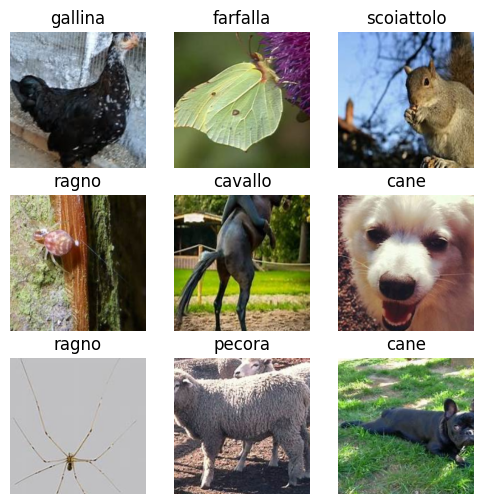

In [6]:
# Create DataLoaders
dls = dblock.dataloaders(path)

# Show a batch of images
dls.show_batch(max_n=9, figsize=(6,6))

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 159MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.281121,0.155392,0.045463,01:48


epoch,train_loss,valid_loss,error_rate,time
0,0.174479,0.117217,0.036485,01:19
1,0.152262,0.137724,0.041452,01:22
2,0.117961,0.119965,0.035721,01:22
3,0.063049,0.114028,0.032474,01:24
4,0.031514,0.105559,0.027889,01:22
5,0.021426,0.105107,0.027507,01:22


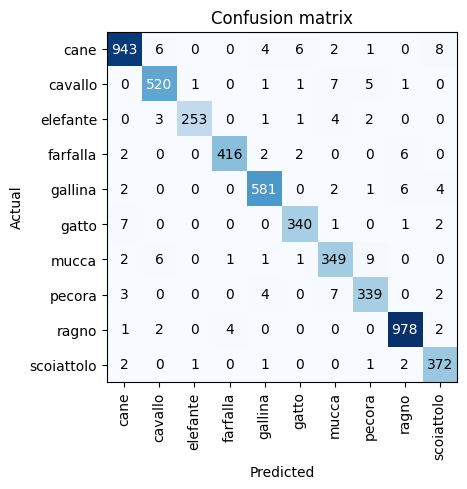

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

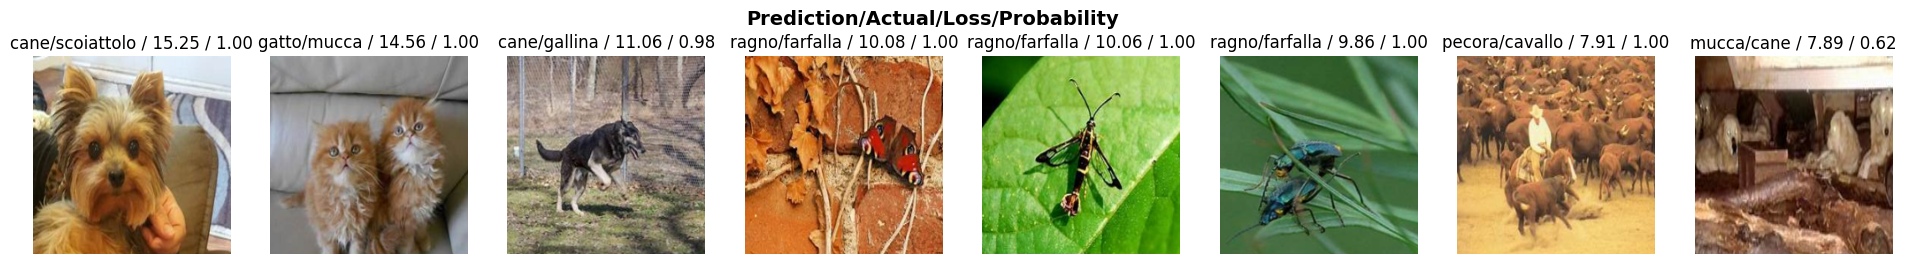

In [10]:
interp.plot_top_losses(8, nrows=1)

In [11]:
#Model export
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
#hide_output
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)

In [ ]:
cleaner

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/kaggle/input/inferencepicture/catimage.jpg')

In [ ]:
##Ensure correct version
!pip install --upgrade ipywidgets

In [ ]:
from ipywidgets import widgets
from fastai.vision.widgets import *

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload